1. Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 

2.Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

3. *Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM
4. *Предложите свои варианты решения проблемы исчезающего градиента в RNN

Решение:

Очень долго пытался обучить модель на датасете исторических данных Forex с частотой 1 час.

Построил несколько LSTM моделей.  

In [72]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:72.5% !important; }</style>"))

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [75]:
df = pd.read_csv('/eurusd_hour.csv', skipfooter = 5, engine='python')

In [76]:
df.head() #это датасет архивных данных Forex

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030


Описание датасета: 
Это архивные данные пары евро/доллар

data - дата
time - время
ВО - Цена открытия торгов
BH - Caмая высокая цена предложения
BL - Самая низкая цена предложения
ВС - Цена закрытия торгов
BCh - Изменение цены предложения
AO - Цена открытия 
AH - Самая высокая цена продажи
AL - Самая низкая цена предложения
AC - 

In [77]:
#df.loc[:,'Date'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time.astype(str))

In [78]:
data = df[['Date','BO']]
data.head()

,Date,BO
0,2005-05-02,1.28520
1,2005-05-02,1.28440
2,2005-05-02,1.28430
3,2005-05-02,1.28510
4,2005-05-02,1.28520


In [79]:
data.dtypes

Date     object
BO      float64
dtype: object

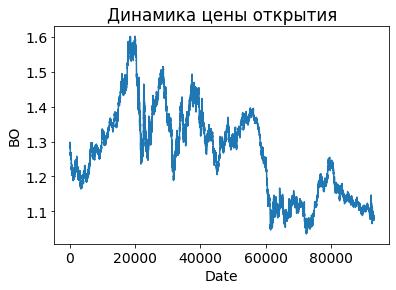

In [81]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('BO')
plt.title('Динамика цены открытия')
plt.show()

In [82]:
# Preprocessing
dataset = dataset.reshape(-1, 1)
dataset = dataset.astype('float32')
dataset.shape

(93079, 1)

In [83]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [84]:
train_size = int(len(dataset)*0.54)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train),len(test))

50262 42817


In [85]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
time_temp = 10
X_temp = []
Y_temp = []
for i in range(len(train)-time_temp-1):
    a = train[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(train[i + time_temp, 0])
X_train = np.array(X_temp)
y_train = np.array(Y_temp)

In [86]:
X_temp = []
Y_temp = []
for i in range(len(test)-time_temp-1):
    a = test[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(test[i + time_temp, 0])
X_test = np.array(X_temp)
y_test = np.array(Y_temp)

In [87]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Собираем модель

In [88]:
model = Sequential([
    LSTM(15, input_shape=(1,time_temp)),
    Dense(1)
])

In [89]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
%%time
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
50251/50251 [==============================] - 59s 1ms/step - loss: 2.3451e-04
Epoch 2/50
50251/50251 [==============================] - 59s 1ms/step - loss: 3.1267e-05
Epoch 3/50
50251/50251 [==============================] - 59s 1ms/step - loss: 2.8867e-05
Epoch 4/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.6683e-05
Epoch 5/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.5557e-05
Epoch 6/50
50251/50251 [==============================] - 59s 1ms/step - loss: 2.4987e-05
Epoch 7/50
50251/50251 [==============================] - 61s 1ms/step - loss: 2.4096e-05
Epoch 8/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.3075e-05
Epoch 9/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.2575e-05
Epoch 10/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.2304e-05
Epoch 11/50
50251/50251 [==============================] - 60s 1ms/step - loss: 2.1835e-05
Epoch 12

In [91]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


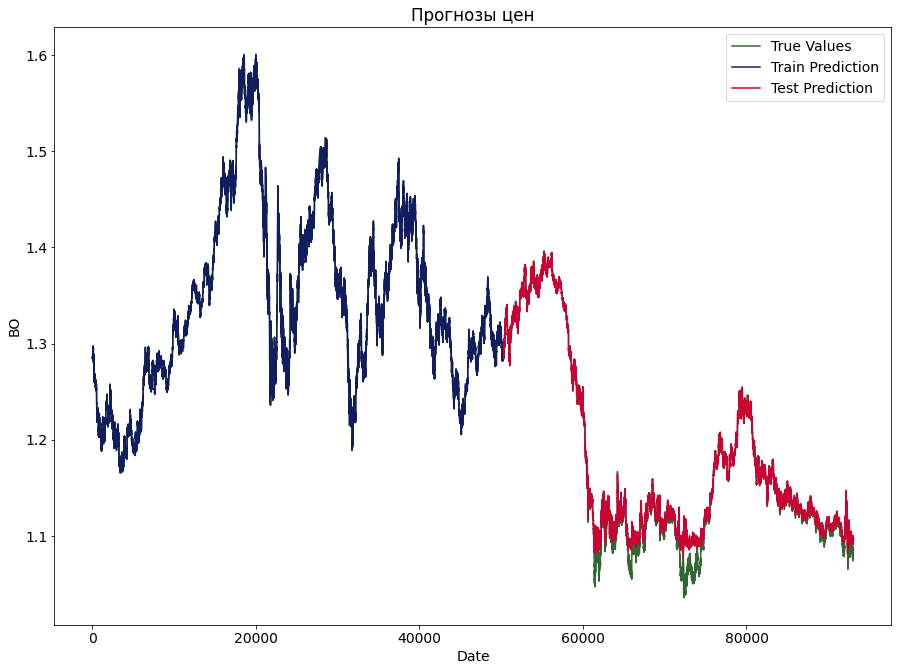

In [93]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_temp:len(trainPredict)+time_temp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_temp*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize = (15, 11))
plt.plot(scaler.inverse_transform(dataset), label = 'True Values', color='#336633')
plt.plot(trainPredictPlot, label='Train Prediction', color='#111d5e')
plt.plot(testPredictPlot, label = 'Test Prediction', color='#CC0033')
plt.xlabel('Date')
plt.ylabel('BO')
plt.title('Прогнозы цен')
plt.legend()
plt.savefig(fname = 'Results')
plt.show()

Как видно ошибка очень меленькая, при этом из графика видно, что прогнозы не соответствуют действительности. 

Попробуем реализовать модель по аналогии с тем, что было на лекции

In [110]:
df.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030


In [111]:
data = df.iloc[1500:,1:] 

In [112]:
data.shape[1]

11

In [115]:
data.head()

,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
1500,12:00,1.19925,1.20316,1.19641,1.20200,0.00275,1.19940,1.20331,1.19659,1.20215,0.00275
1501,13:00,1.20200,1.20487,1.20180,1.20207,0.00007,1.20215,1.20502,1.20195,1.20297,0.00082
1502,14:00,1.20197,1.20540,1.20197,1.20380,0.00183,1.20287,1.20555,1.20255,1.20395,0.00108
1503,15:00,1.20380,1.20570,1.20360,1.20480,0.00100,1.20395,1.20585,1.20375,1.20495,0.00100
1504,16:00,1.20480,1.20615,1.20415,1.20555,0.00075,1.20495,1.20630,1.20430,1.20570,0.00075


In [113]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [117]:
data.dtypes

Time     object
BO      float64
BH      float64
BL      float64
BC      float64
BCh     float64
AO      float64
AH      float64
AL      float64
AC      float64
ACh     float64
dtype: object

In [120]:
data = df.iloc[1500:,2:] 

In [122]:
train_split = 1000
data_v =  normalize(data.values, train_split)
data_f = pd.DataFrame(data_v)

In [123]:
# список признаков, по которым будем учить
channelIndexes = [0,1, 2, 4, 5, 6, 7]

# длина теста
valLen = 100
# длина истории для работы
xLen = 3
# отступ тестов от тренировок
bias = 10

# вычисляем точку разделения ряда на тесты и тренировку
#train_split = data_f.shape[0] - valLen - bias
# делим
train_data = data_f.iloc[0 : train_split - 1,channelIndexes]
val_data = data_f.iloc[train_split+bias:,channelIndexes]

In [124]:
train_data.head(7)

,0,1,2,4,5,6,7
0,-2.58717,-2.33462,-2.76076,2.09510,-2.58939,-2.33579,-2.75962
1,-2.35179,-2.18830,-2.29772,0.03974,-2.35407,-2.18958,-2.29940
2,-2.35436,-2.14295,-2.28312,1.38953,-2.29246,-2.14426,-2.24788
3,-2.19772,-2.11728,-2.14309,0.75298,-2.20005,-2.11861,-2.14485
4,-2.11212,-2.07877,-2.09584,0.56125,-2.11448,-2.08013,-2.09762
5,-2.04793,-1.97609,-2.05288,0.90637,-2.05030,-1.97753,-2.05469
6,-1.94521,-1.89479,-1.87677,0.69930,-1.94762,-1.89630,-1.87867


In [126]:
# шаг по данным для построения обучающих примеров
step = 1

# длина прошлого 
past = xLen
p = past
# горизонт предсказания
future = 1
h=future

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32
epochs = 10


In [127]:
start = xLen + future
end = start + train_split-1

xTrain = train_data[[train_data.columns[i] for i in range(7)]].values
yTrain = data_f.iloc[start:end,0].values

sequence_length = int(xLen / step)


x_end = len(val_data) - xLen - future

label_start = len(train_data)+bias+xLen + future

xVal = val_data.iloc[:x_end+1][[val_data.columns[i] for i in range(7)]].values
yVal = data_f.iloc[label_start:,0].values

In [128]:
print(xTrain.shape)

print(yTrain.shape)


print(xVal.shape)

print(yVal.shape)

(999, 7)
(999,)
(90566, 7)
(90566,)


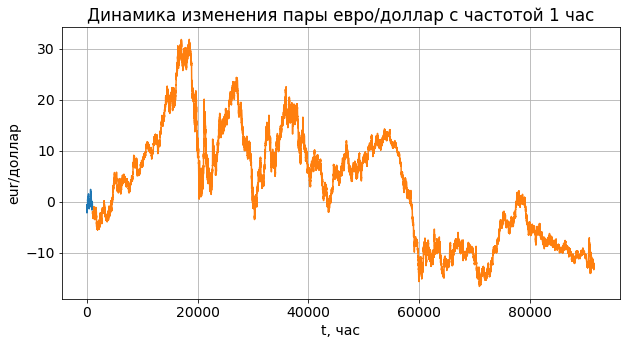

In [130]:
plt.figure(figsize=(10,5))
plt.plot(data_f.index[xLen:yTrain.shape[0]+xLen],yTrain[:])
plt.plot(data_f.index[yTrain.shape[0]+xLen+bias+future:],yVal[:])
plt.grid('on')
plt.xlabel('t, час')
plt.ylabel('eur/доллар')
plt.title('Динамика изменения пары евро/доллар с частотой 1 час')
plt.show()

In [132]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [133]:



dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrain,
    yTrain,
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVal,
    yVal,
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)

In [134]:
for batch in dataset_train.take(2):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 3, 7)
Target shape: (32,)


In [135]:
inputs[2,:,0]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([-1.44447979, -1.42051316, -1.42479292])>

In [136]:
targets[0]

<tf.Tensor: shape=(), dtype=float64, numpy=-1.4247929156702668>

Epoch 1/10
32/32 [==============================] - 16s 490ms/step - loss: 0.4743 - mae: 0.5122 - val_loss: 92.6127 - val_mae: 7.6571
Epoch 2/10
32/32 [==============================] - 15s 468ms/step - loss: 0.1091 - mae: 0.2469 - val_loss: 92.4064 - val_mae: 7.6958
Epoch 3/10
32/32 [==============================] - 15s 467ms/step - loss: 0.0705 - mae: 0.2055 - val_loss: 87.7240 - val_mae: 7.4451
Epoch 4/10
32/32 [==============================] - 15s 465ms/step - loss: 0.0556 - mae: 0.1805 - val_loss: 82.9601 - val_mae: 7.1868
Epoch 5/10
32/32 [==============================] - 15s 463ms/step - loss: 0.0548 - mae: 0.1799 - val_loss: 78.7394 - val_mae: 6.9487
Epoch 6/10
32/32 [==============================] - 15s 466ms/step - loss: 0.0529 - mae: 0.1768 - val_loss: 75.1196 - val_mae: 6.7372
Epoch 7/10
32/32 [==============================] - 15s 467ms/step - loss: 0.0501 - mae: 0.1721 - val_loss: 72.0446 - val_mae: 6.5505
Epoch 8/10
32/32 [==============================] - 15s 459ms/

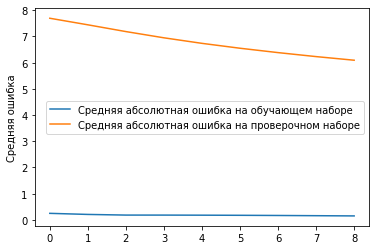

In [138]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()

model.add(LSTM(32, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences="True"))
model.add(LSTM(32, return_sequences="True"))
model.add(Conv1D(64, 3, activation="linear"))
#model.add(Conv1D(64, 1, activation="linear"))
model.add(Flatten())
model.add(Dense(3, activation="linear"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[callback])


plt.plot(history.history['mae'][1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()


Как видно из графика, ошибки не сошлись. Попробуем добавить слои и эпохи

Epoch 1/50
32/32 [==============================] - 16s 493ms/step - loss: 0.3930 - mae: 0.4700 - val_loss: 91.0982 - val_mae: 7.5345
Epoch 2/50
32/32 [==============================] - 15s 468ms/step - loss: 0.0945 - mae: 0.2352 - val_loss: 92.1352 - val_mae: 7.6494
Epoch 3/50
32/32 [==============================] - 15s 480ms/step - loss: 0.0815 - mae: 0.2204 - val_loss: 89.2777 - val_mae: 7.4820
Epoch 4/50
32/32 [==============================] - 15s 477ms/step - loss: 0.0514 - mae: 0.1740 - val_loss: 85.6241 - val_mae: 7.2825
Epoch 5/50
32/32 [==============================] - 15s 473ms/step - loss: 0.0532 - mae: 0.1774 - val_loss: 81.9820 - val_mae: 7.0722
Epoch 6/50
32/32 [==============================] - 16s 494ms/step - loss: 0.0504 - mae: 0.1723 - val_loss: 78.6641 - val_mae: 6.8797
Epoch 7/50
32/32 [==============================] - 17s 518ms/step - loss: 0.0488 - mae: 0.1695 - val_loss: 75.6267 - val_mae: 6.7007
Epoch 8/50
32/32 [==============================] - 16s 488ms/

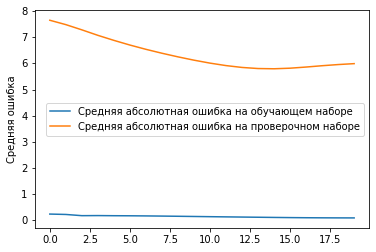

In [140]:
epochs = 50

callback = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()

model.add(LSTM(32, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences="True"))
model.add(LSTM(32, return_sequences="True"))
model.add(Conv1D(64, 3, activation="linear"))
#model.add(Conv1D(64, 1, activation="linear"))
model.add(Flatten())
model.add(Dense(3, activation="linear"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[callback])


plt.plot(history.history['mae'][1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [141]:
hist_val = history.history['val_mae']
hist_train = history.history['mae']

Epoch 1/50
32/32 [==============================] - 15s 481ms/step - loss: 0.0150 - mae: 0.0869 - val_loss: 65.5122 - val_mae: 6.0148
Epoch 2/50
32/32 [==============================] - 15s 481ms/step - loss: 0.0149 - mae: 0.0863 - val_loss: 65.6826 - val_mae: 6.0277
Epoch 3/50
32/32 [==============================] - 16s 486ms/step - loss: 0.0148 - mae: 0.0859 - val_loss: 65.6335 - val_mae: 6.0266
Epoch 4/50
32/32 [==============================] - 15s 481ms/step - loss: 0.0147 - mae: 0.0860 - val_loss: 65.3895 - val_mae: 6.0132
Epoch 5/50
32/32 [==============================] - 16s 488ms/step - loss: 0.0148 - mae: 0.0864 - val_loss: 65.0080 - val_mae: 5.9910
Epoch 6/50
32/32 [==============================] - 15s 480ms/step - loss: 0.0149 - mae: 0.0871 - val_loss: 64.5531 - val_mae: 5.9640
Epoch 7/50
32/32 [==============================] - 15s 474ms/step - loss: 0.0151 - mae: 0.0880 - val_loss: 64.0904 - val_mae: 5.9364
Epoch 8/50
32/32 [==============================] - 15s 473ms/

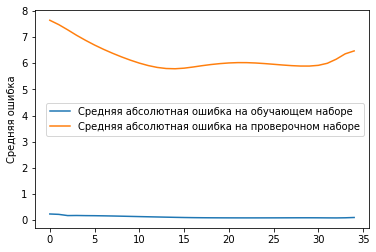

In [142]:
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[callback])

hist_val.extend(history.history['val_mae'][:])
hist_train.extend(history.history['mae'][:])

plt.plot(hist_train[1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(hist_val[1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [143]:
pred = model.predict(dataset_train).flatten()
predVal = model.predict(dataset_val).flatten()

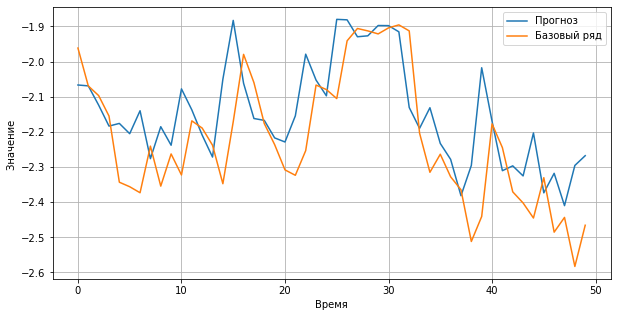

In [144]:
start = 0
step = 50
plt.figure(figsize=(10,5))
plt.grid('on')
plt.plot(predVal[h+start:h+start+step], 
         label='Прогноз')
plt.plot(yVal.flatten()[start:start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

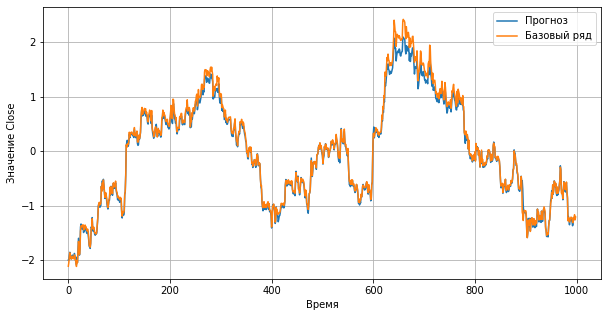

In [145]:
start = 0


plt.figure(figsize=(10,5))
plt.grid('on')
plt.plot(pred[h+start:h+train_split], 
         label='Прогноз')
plt.plot(yTrain.flatten()[start:train_split], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение Close')
plt.legend()
plt.show()

In [146]:
def correlate(a, b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()
  
  val = 0
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

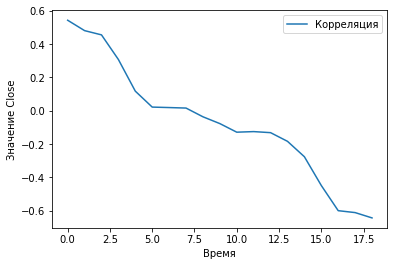

In [147]:
corr = []
start = 0
step = 50
yLen = yVal.shape[0]
yValF = yVal[start:start+step].flatten()
yPredVal = predVal[h+start:start+step+h]
for i in range(1,20):
  corr.append(correlate(yValF[:-i], yPredVal[i:]))
  
plt.plot(corr, 
         label='Корреляция')
plt.xlabel('Время')
plt.ylabel('Значение Close')
plt.legend()
plt.show()

In [148]:
corr

[0.5419732050400123,
 0.47972031025651257,
 0.454274695177298,
 0.30658129434615283,
 0.11677479330687382,
 0.021237956224667887,
 0.01845464784433558,
 0.01542693211044858,
 -0.03693049861380148,
 -0.07770179779329303,
 -0.12921578620256408,
 -0.12571224147665142,
 -0.13205946434080426,
 -0.18402349669538834,
 -0.2764534780838747,
 -0.44891152816397467,
 -0.5998326927684641,
 -0.6113048311292129,
 -0.6432503445365401]

В целом как видно данные Forex слабо поддаются прогнозированию. Этот датасет содержит сведения за 15 лет с частотой 1 час. Можно попороборать добыть более детальные данные, и пересчитать его. 

Не могли бы Вы подсказать, что можно сделать, чтобы попытаться улучшить результат.